# Preliminares

El archivo `worldcities.csv` contiene información actualizada sobre aproximadamente 43 mil ciudades alrededor del mundo.

# Tareas
1. Agrupar las ciudades en 6 continentes considerando las coordenadas de longitud (`lng`) y latitud (`lat`). Comparar los resultados entregados por tres algoritmos de clustering vistos en el curso y comentar cual se comporta mejor de acuerdo a sus conocimientos geográficos. Compare visualmente los clustering a través de `subplots` y señale cual es la configuración de parámetros utilizada en cada algoritmo.

## Importamos las bibliotecas y módulos necesarios

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Recolección de datos

In [63]:
df = pd.read_csv('worldcities.csv')
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


## Preparación de los datos

In [64]:
df.drop(['capital','id'], axis=1, inplace=True)

In [65]:
#df = df[df.lng >= 0]

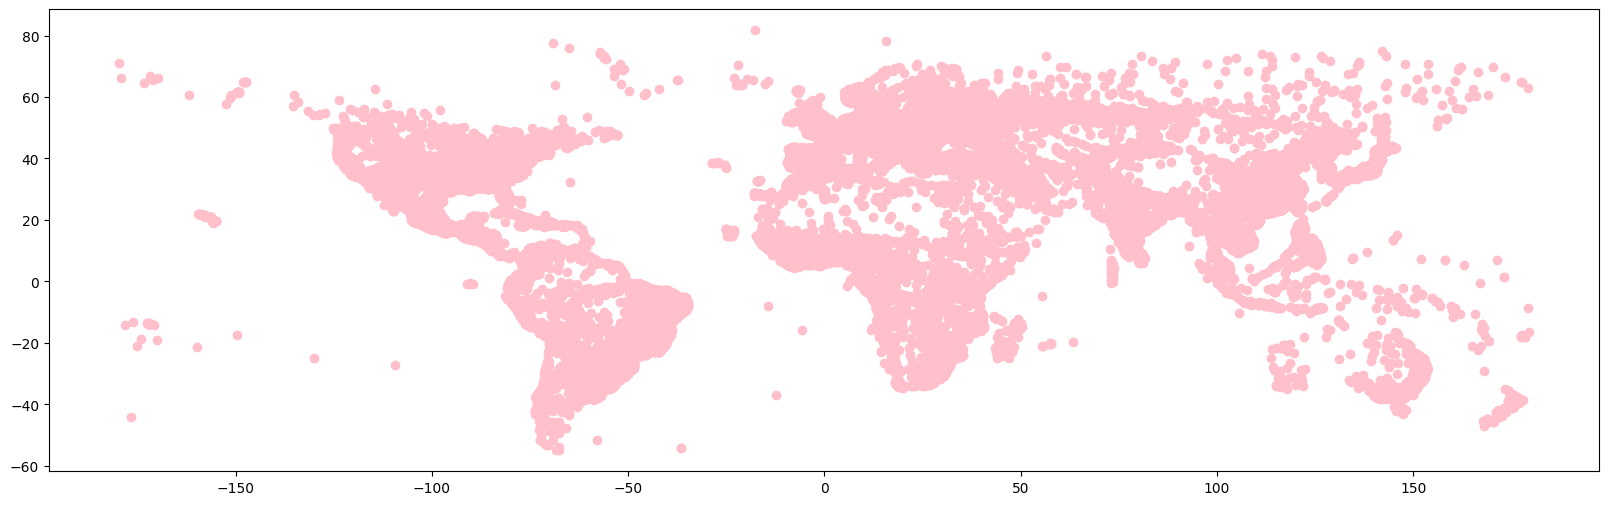

In [66]:
plt.figure(figsize=(20,6))
plt.scatter(df['lng'],df['lat'],c = 'pink')

In [67]:
df.isnull().sum()

city            0
city_ascii      0
lat             0
lng             0
country         0
iso2           32
iso3            0
admin_name     95
population    725
dtype: int64

In [68]:
df_nuevo = df[['lng','lat']]
kmeans = KMeans(n_clusters=6, max_iter=300)
kmeans.fit(df_nuevo)
df_nuevo

,lng,lat
0,139.7744,35.6839
1,106.8451,-6.2146
2,77.2167,28.6667
3,120.9833,14.6000
4,-46.6339,-23.5504
...,...,...
42900,139.5000,57.3670
42901,71.3333,63.6667
42902,-17.8000,81.7166
42903,-42.2167,62.5333


In [69]:
df_nuevo['etiquetas'] = kmeans.labels_
df_nuevo.head()

C:\Users\vicen\AppData\Local\Temp\ipykernel_10584\213520639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['etiquetas'] = kmeans.labels_


,lng,lat,etiquetas
0,139.7744,35.6839,5
1,106.8451,-6.2146,5
2,77.2167,28.6667,2
3,120.9833,14.6000,5
4,-46.6339,-23.5504,4


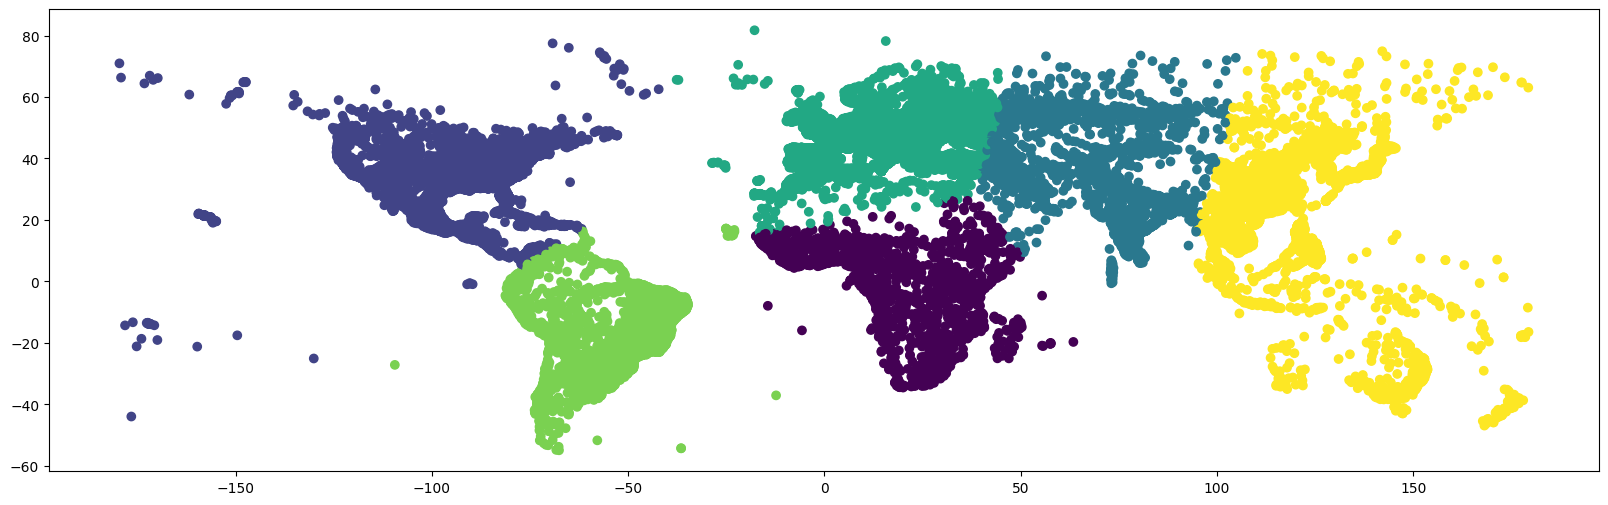

In [70]:
plt.figure(figsize=(20,6))
plt.scatter(data=df_nuevo,x='lng',y='lat',c='etiquetas')

2. Incluir la variable población (`population`) en el análisis y generar $K$ grupos de ciudades de acuerdo al nivel de población utilizando un algoritmo de clustering a elección y definiendo un $K$ razonable. Para la visualización utilice un Colormap secuencial (Por ejemplo: `cmap='Blues'`).

- Para buscar la cantidad óptima de k clusters, podemos utilizar el método del Codo de Jambú. Si nos sale el caso de los NaN, debemos limpiar los datos para tener un dataset correcto.

In [74]:
df_population = df[['lng','lat','population']]
df_population.isnull().sum()

lng             0
lat             0
population    725
dtype: int64

In [76]:
df_population = df_population.dropna()
df_population

,lng,lat,population
0,139.7744,35.6839,39105000.0
1,106.8451,-6.2146,35362000.0
2,77.2167,28.6667,31870000.0
3,120.9833,14.6000,23971000.0
4,-46.6339,-23.5504,22495000.0
...,...,...,...
42900,139.5000,57.3670,10.0
42901,71.3333,63.6667,10.0
42902,-17.8000,81.7166,10.0
42903,-42.2167,62.5333,10.0


In [82]:
sse = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(df_population) #Se aplica K-means al dataFrame
    sse.append(kmeans.inertia_)


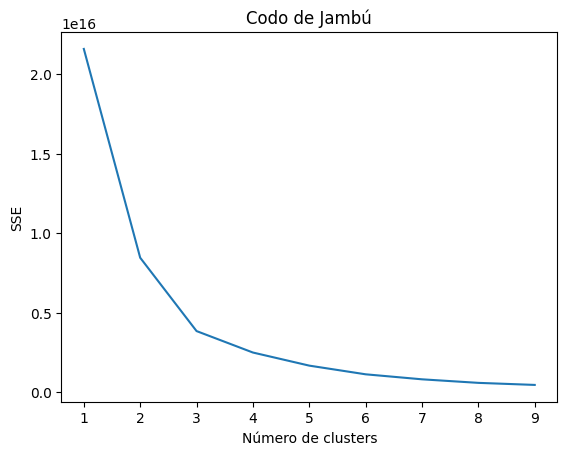

In [83]:
plt.title('Codo de Jambú')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.plot(range(1,10),sse)

In [95]:
kmeans_population = KMeans(n_clusters=100,max_iter=300)
kmeans_population.fit(df_population)

KMeans(n_clusters=100)

In [96]:
df_population['cluster'] = kmeans_population.labels_ 

Text(0.5, 0, 'longitud')

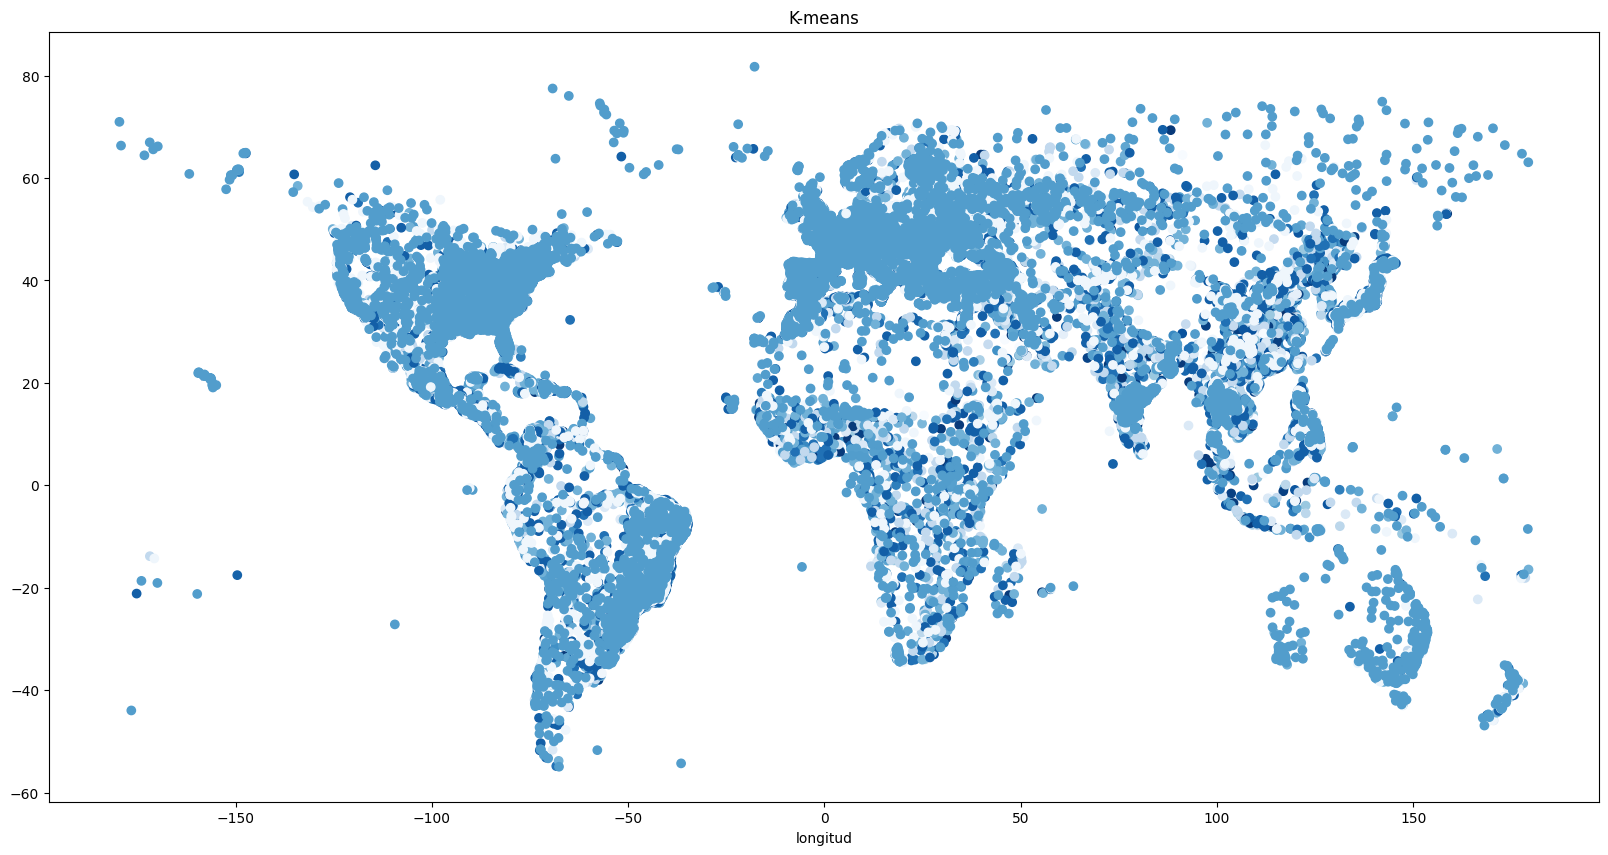

In [97]:
plt.figure(figsize=(20,10))
plt.scatter(data=df_population, x='lng', y='lat', c='cluster',cmap='Blues')

plt.title('K-means')
plt.xlabel('longitud')

3. Realice un filtro para trabajar con las 171 ciudades de Chile presentes en el archivo, y genere 16 clusters utilizando un algoritmo a elección con el objetivo de agrupar por región. Calcule la exactitud del modelo usando la métrica `accuracy_score` disponible en la librería `sklearn.metrics` ([url](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Las etiquetas reales (*Ground truth*) se pueden obtener de la columna `admin_name`. La función `factorize` permite codificar a números las categorías ([url](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)).

In [103]:
df_chile = df.copy()

In [104]:
df_chile=df_chile[df_chile.country == 'Chile']

In [105]:
df_chile

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population
82,Santiago,Santiago,-33.4500,-70.6667,Chile,CL,CHL,Región Metropolitana,7026000.0
1255,Puente Alto,Puente Alto,-33.6167,-70.5833,Chile,CL,CHL,Región Metropolitana,573935.0
1353,Maipú,Maipu,-33.5167,-70.7667,Chile,CL,CHL,Región Metropolitana,521627.0
1748,La Florida,La Florida,-33.5500,-70.5667,Chile,CL,CHL,Región Metropolitana,366916.0
1838,Antofagasta,Antofagasta,-23.6464,-70.3980,Chile,CL,CHL,Antofagasta,348517.0
...,...,...,...,...,...,...,...,...,...
42822,Balsadero Río Verde,Balsadero Rio Verde,-52.6500,-71.4666,Chile,CL,CHL,Magallanes y de la Antártica Chilena,358.0
42832,Villa O’Higgins,Villa O'Higgins,-48.4669,-72.5930,Chile,CL,CHL,Aysén,250.0
42850,Cuya,Cuya,-19.1597,-70.1794,Chile,CL,CHL,Tarapacá,20.0
42854,Chuquicamata,Chuquicamata,-22.3169,-68.9301,Chile,CL,CHL,Antofagasta,0.0


In [124]:
clustering_chile = KMeans(n_clusters=16)
clustering_chile.fit(df_chile[['lng','lat']])
df_chile['cluster'] = clustering_chile.labels_

Text(0.5, 0, 'longitud')

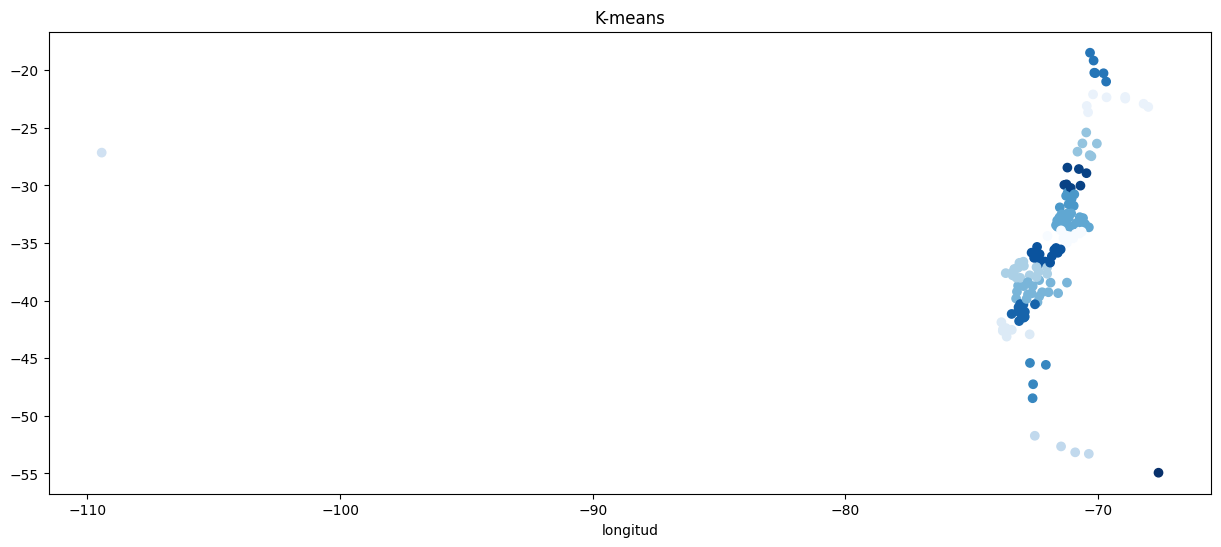

In [125]:
plt.figure(figsize=(15,6))
plt.scatter(data=df_chile, x='lng', y='lat', c='cluster',cmap='Blues')
plt.title('K-means')
plt.xlabel('longitud')

In [126]:
from sklearn.metrics import accuracy_score


- Para comparar las etiquetas, debemos utilizar la función factorize para pasar las regiones a números y no string

In [127]:
etiquetas_reales, uniques = pd.factorize(df_chile['admin_name'])

In [128]:
df_chile['regiones_numero'] = etiquetas_reales

## Evaluación del modelo mediante métricas

In [130]:
accuracy_score(df_chile['regiones_numero'],df_chile['cluster'])*100

15.204678362573098

In [138]:
df_usa = df.copy()

In [141]:
#df_usa = df_usa.drop('etiquetas',axis=1)
df_usa=df_usa[df_usa.country == 'United States']
df_usa.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,cluster
12,New York,New York,40.6943,-73.9249,United States,US,USA,New York,18713220.0,3
27,Los Angeles,Los Angeles,34.1139,-118.4068,United States,US,USA,California,12750807.0,23
51,Chicago,Chicago,41.8373,-87.6862,United States,US,USA,Illinois,8604203.0,15
91,Miami,Miami,25.7839,-80.2102,United States,US,USA,Florida,6445545.0,10
108,Dallas,Dallas,32.7936,-96.7662,United States,US,USA,Texas,5743938.0,37


In [153]:
clustering_usa = KMeans(n_clusters=50)
clustering_usa.fit(df_usa[['lng','lat']])
df_usa['cluster'] = clustering_usa.labels_

In [154]:
etiquetas_reales, uniques = pd.factorize(df_usa['admin_name'])

Text(0.5, 0, 'longitud')

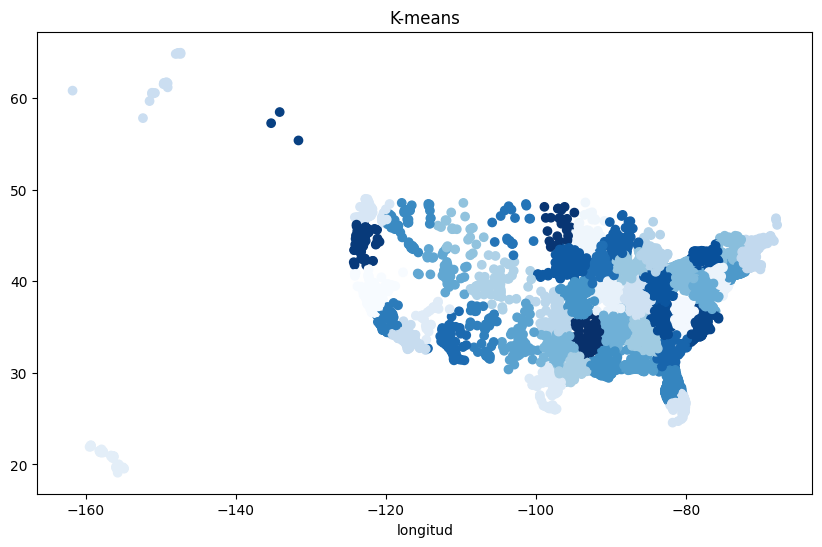

In [155]:
plt.figure(figsize=(10,6))
plt.scatter(data=df_usa, x='lng', y='lat', c='cluster',cmap='Blues')
plt.title('K-means')
plt.xlabel('longitud')

In [156]:
df_usa['regiones_numero'] = etiquetas_reales

In [157]:
accuracy_score(df_usa['regiones_numero'],df_usa['cluster'])*100

2.0322085889570554